# Description and Problem Statement:

We will be studyig "How a student's lifestyle affect thier grades" mainly using the k-means clustering method. By doing so, we can analyse the groups that can be found to affect a student's grades.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
sb.set() 

In [2]:
df = pd.read_csv('student-por.csv', sep=';') 

### Exploring the data

In [3]:
df.head()
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
df.info() #Seeing the different dtypes to work with
df.isnull().sum() #Checking if there are any NAN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Creating a new dataframe to select the various categories that might affect lifestyle 

In [5]:
def convert_to_float(df, cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
        df[col] = df[col].astype(float)
    return df

def convert_yesno_to_numeric(df, col_name):
    column_map = {'no': 0, 'yes': 1}
    df[col_name] = df[col_name].map(column_map)
    return df

In [6]:
convert_yesno_to_numeric(df, 'paid')
convert_yesno_to_numeric(df, 'activities')
convert_yesno_to_numeric(df, 'internet')
convert_yesno_to_numeric(df, 'romantic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    int64 
 18  activities  649 non-null    int64 
 19  nursery     649 non-null    object
 20  higher    

In [7]:
chosen = df[["age","studytime", "failures","paid","activities","internet","romantic","freetime","goout","Dalc","Walc","absences", "G1","G2","G3"]]

In [8]:
chosen.info()
chosen.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         649 non-null    int64
 1   studytime   649 non-null    int64
 2   failures    649 non-null    int64
 3   paid        649 non-null    int64
 4   activities  649 non-null    int64
 5   internet    649 non-null    int64
 6   romantic    649 non-null    int64
 7   freetime    649 non-null    int64
 8   goout       649 non-null    int64
 9   Dalc        649 non-null    int64
 10  Walc        649 non-null    int64
 11  absences    649 non-null    int64
 12  G1          649 non-null    int64
 13  G2          649 non-null    int64
 14  G3          649 non-null    int64
dtypes: int64(15)
memory usage: 76.2 KB


,age,studytime,failures,paid,activities,internet,romantic,freetime,goout,Dalc,Walc,absences,G1,G2,G3
0,18,2,0,0,0,0,0,3,4,1,1,4,0,11,11
1,17,2,0,0,0,1,0,3,3,1,1,2,9,11,11
2,15,2,0,0,0,1,0,3,2,2,3,6,12,13,12
3,15,3,0,0,1,1,1,2,2,1,1,0,14,14,14
4,16,2,0,0,0,0,0,3,2,1,2,0,11,13,13


In [9]:
chosen.describe()

,age,studytime,failures,paid,activities,internet,romantic,freetime,goout,Dalc,Walc,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,1.930663,0.221880,0.060092,0.485362,0.767334,0.368259,3.180277,3.184900,1.502311,2.280431,3.659476,11.399076,11.570108,11.906009
std,1.218138,0.829510,0.593235,0.237841,0.500171,0.422857,0.482704,1.051093,1.175766,0.924834,1.284380,4.640759,2.745265,2.913639,3.230656
min,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,1.000000,1.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### Data Visualization

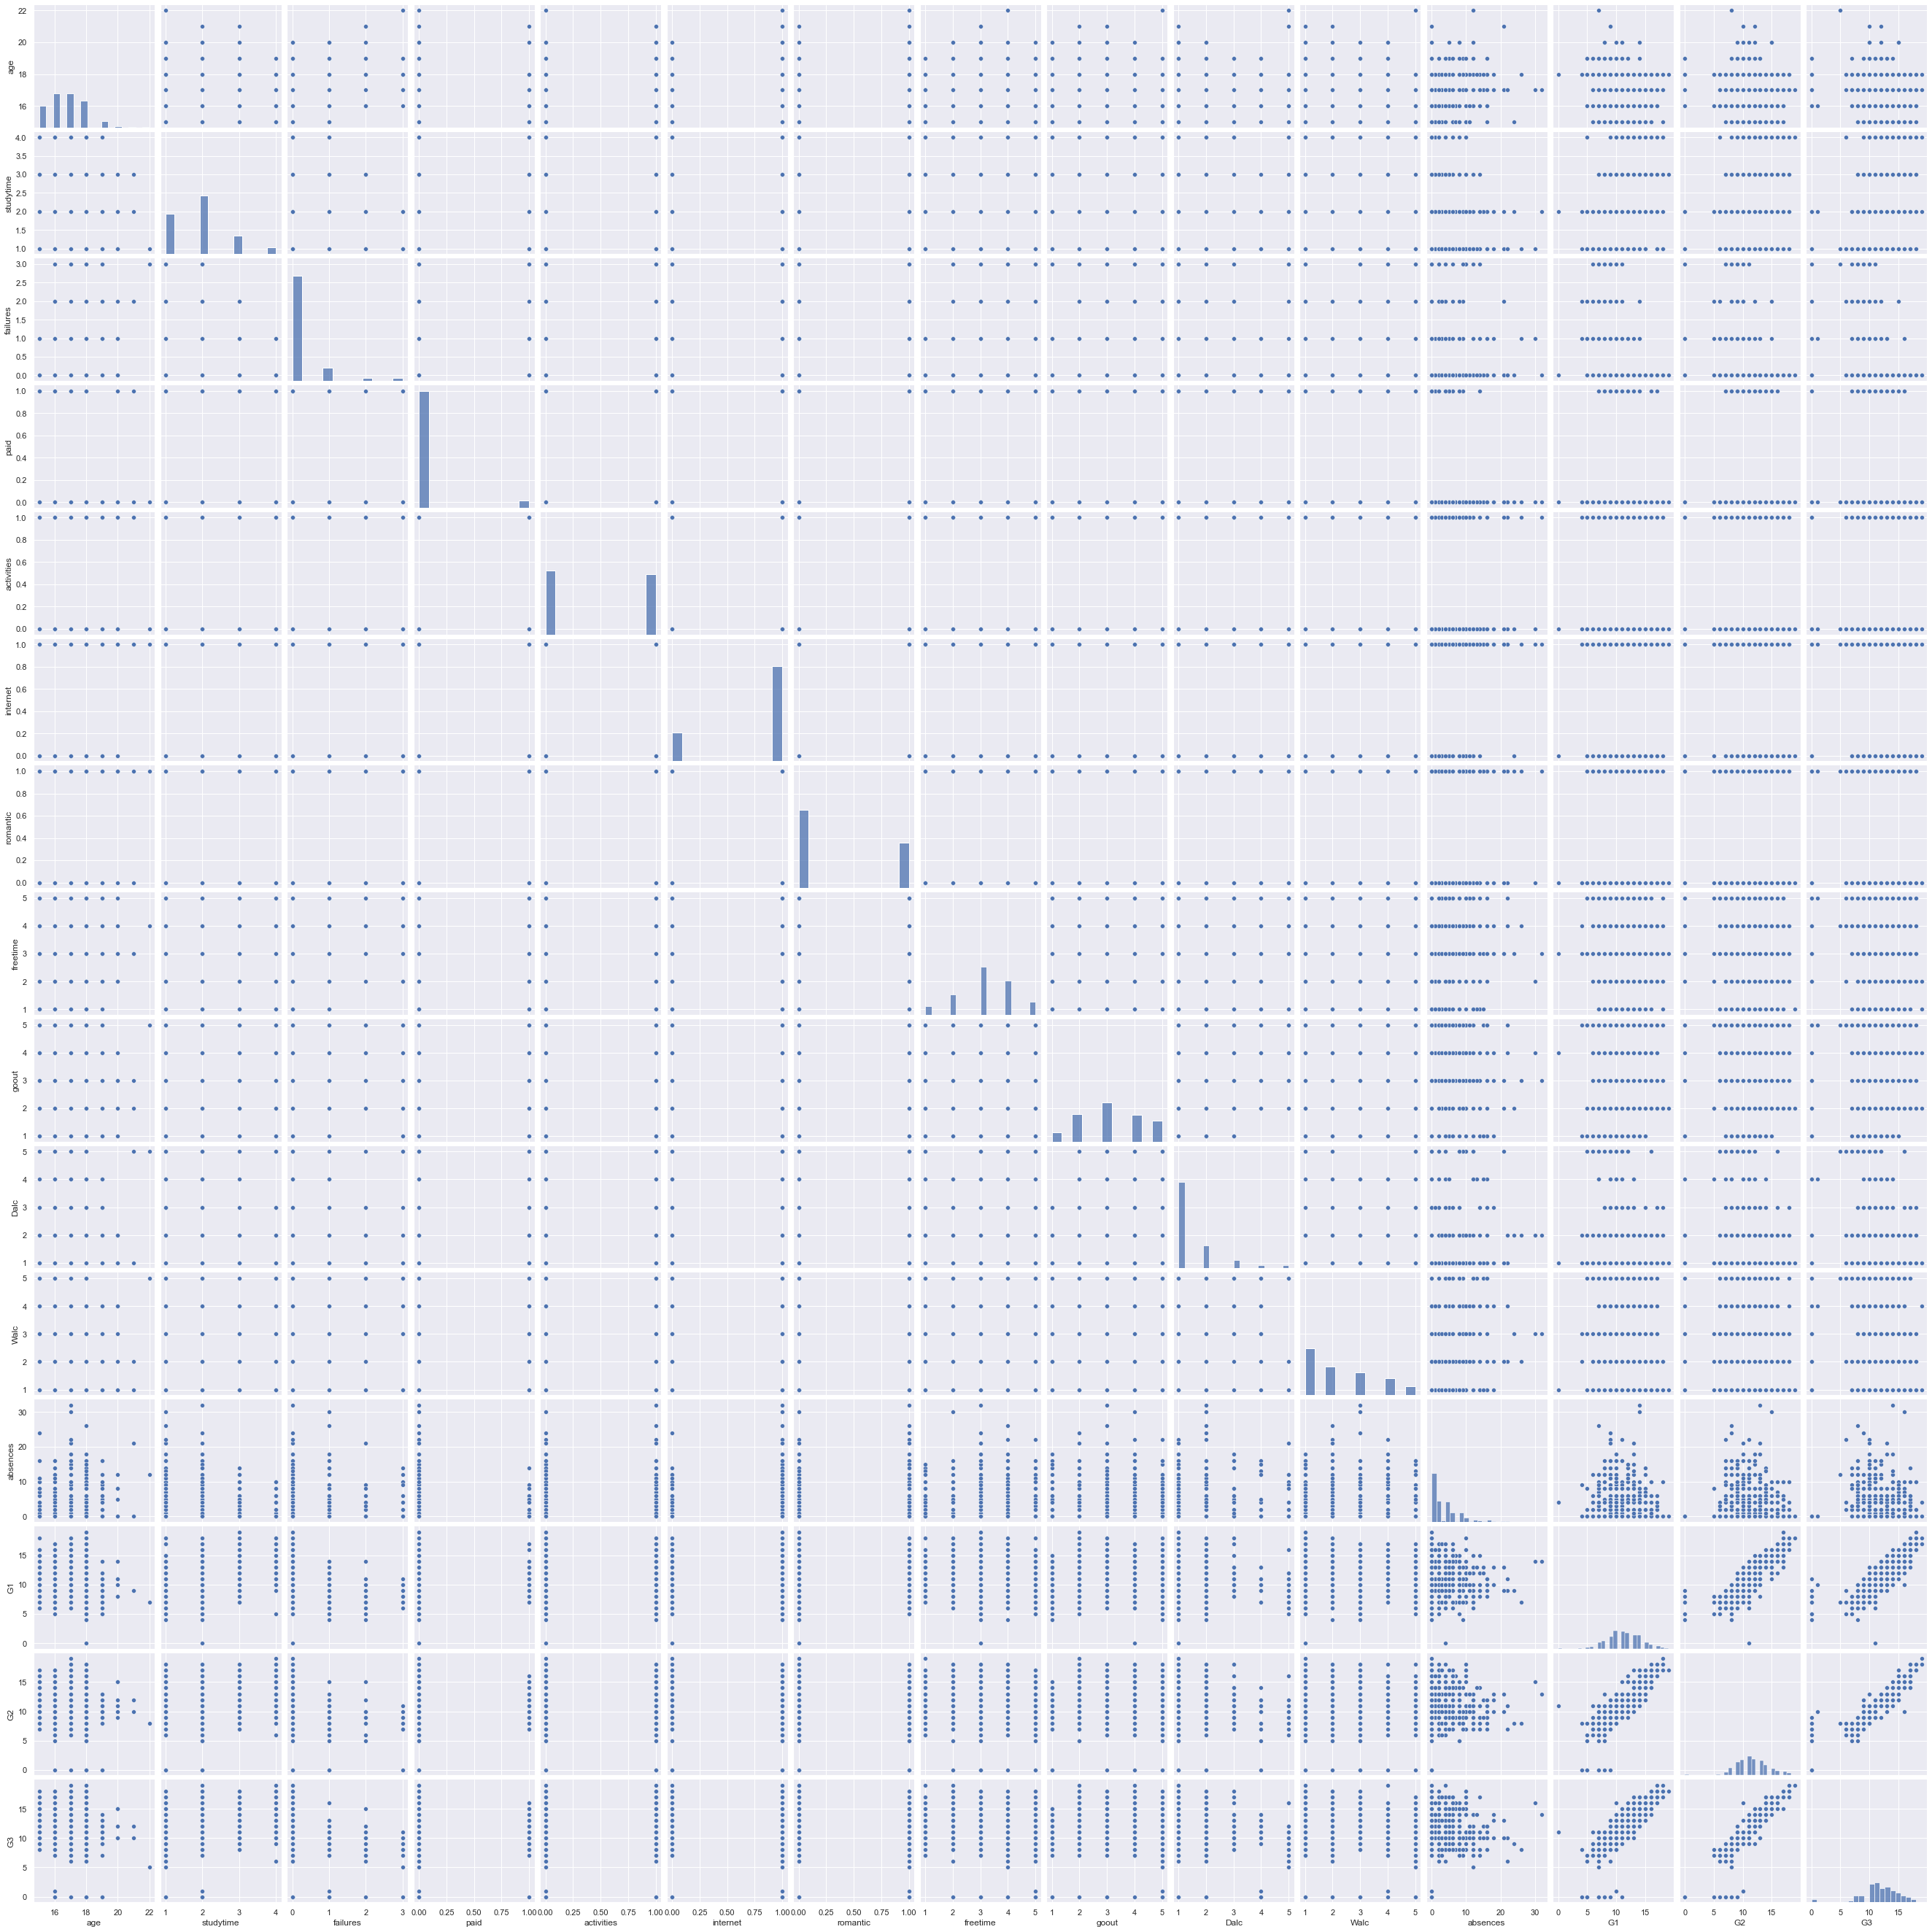

In [10]:
sb.pairplot(chosen)

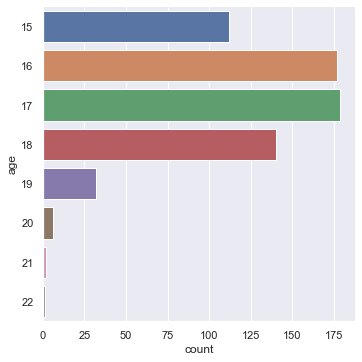

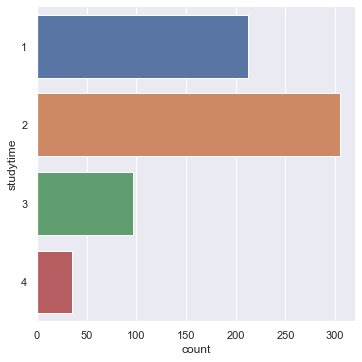

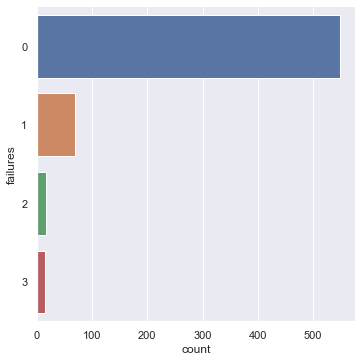

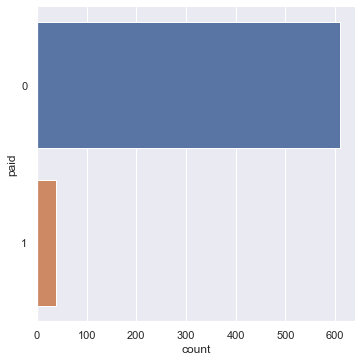

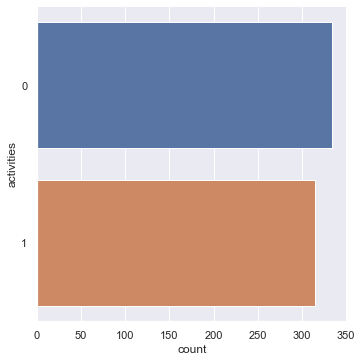

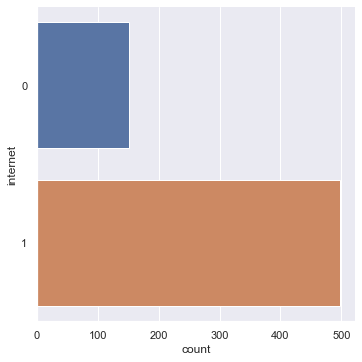

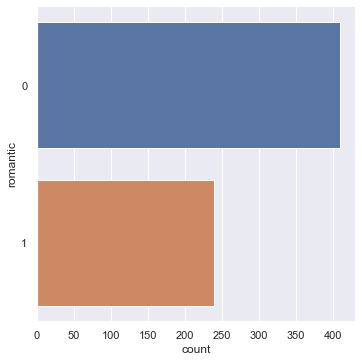

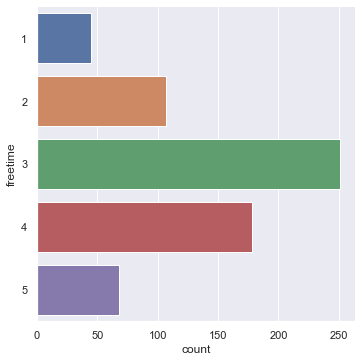

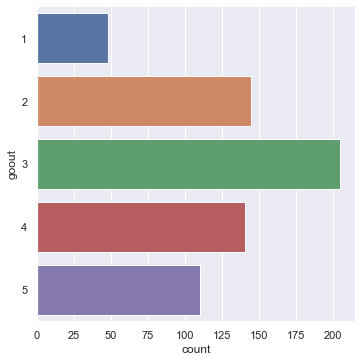

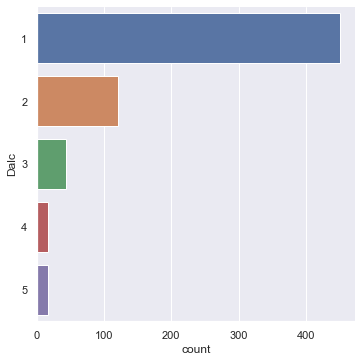

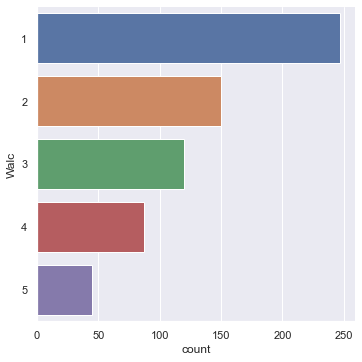

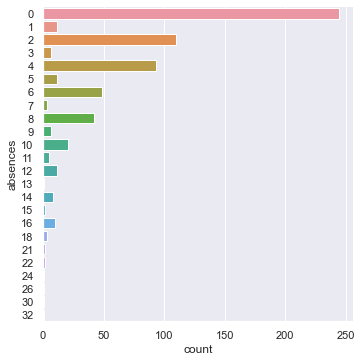

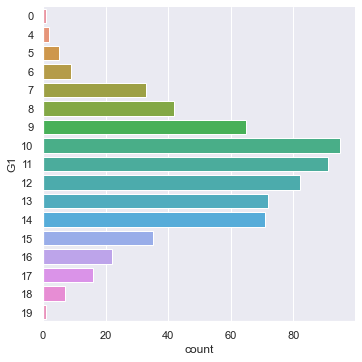

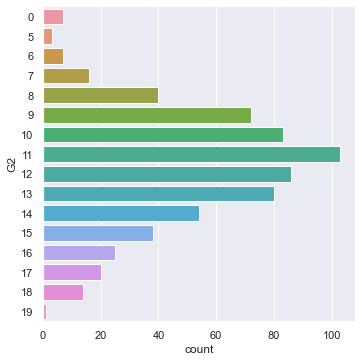

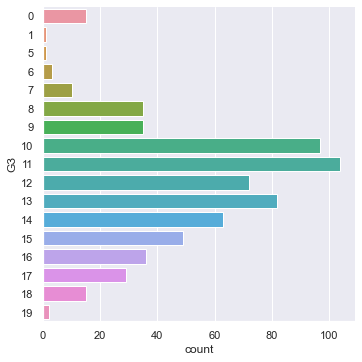

In [11]:
for var2 in chosen:
        sb.catplot( y = var2, data = chosen, kind = "count", height = 5)
        
plt.show()

### Preparing the data for clustering
Standardizing the data before applying the elbow method is an important step in ensuring that the clustering algorithm is not biased towards certain features, and in facilitating a meaningful comparison of WCSS values for different numbers of clusters.


In [12]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
chosen_scaled = scaler.fit_transform(chosen)

### Clustering using K-means
Use the elbow method to find the optimal number of clusters.

When the slope is more gentle, information gain becomes constant and we  choose optimal number of clusters before this happens

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


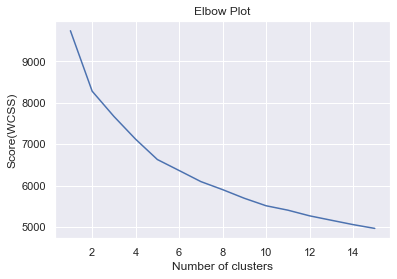

In [13]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(chosen_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 16), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Score(WCSS)')
plt.show()


Based on the elbow method, it seems that 5 clusters might be the optimal number.

In [14]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
pred_y = kmeans.fit_predict(chosen_scaled)

In [15]:
#adding clusters into student df
df['cluster'] = list(pred_y)

In [16]:
colors = ['#DF2020', '#81DF20', '#2095DF', '#FFFF00', '#A020F0'] #Red, green, blue, yellow, purple
df['colors'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

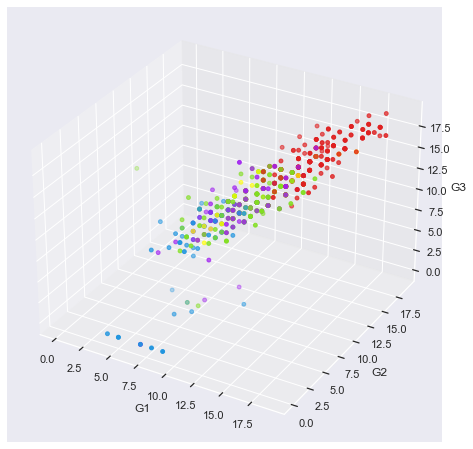

In [17]:
# Plot the clusters
fig = plt.figure(figsize=(35,8))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.G1, df.G2, df.G3, c=df.colors, s=15)
ax.set_xlabel('G1')
ax.set_ylabel('G2')
ax.set_zlabel('G3')
plt.show()

In [18]:
df['colors'].value_counts()

#DF2020    212
#81DF20    204
#A020F0    127
#2095DF     67
#FFFF00     39
Name: colors, dtype: int64

### Interpretation

As shown from the above plot,

Red: 212

Green: 204

Blue: 127

Yellow: 67

Purple: 39

Red has the highest mean score for G1 to G3

Blue has the lowest mean score for G1 to G3

Green, Yellow and Purple have relatively the same mean score throughout G1 to G3


In [19]:
df.groupby(['cluster']).agg(['mean','std'])

age                Medu                Fedu            \
              mean       std      mean       std      mean       std   
cluster                                                                
0        16.679245  1.084550  2.891509  1.098264  2.561321  1.101922   
1        16.348039  1.055805  2.289216  1.050302  2.151961  1.055805   
2        18.074627  1.259069  1.791045  0.946081  1.686567  0.940808   
3        16.717949  1.336703  3.025641  1.012739  2.717949  1.074800   
4        16.795276  1.136261  2.472441  1.167189  2.330709  1.084195   

        traveltime           studytime            ...    health            \
              mean       std      mean       std  ...      mean       std   
cluster                                           ...                       
0         1.405660  0.612327  2.363208  0.817559  ...  3.231132  1.510900   
1         1.578431  0.780757  1.852941  0.767532  ...  3.573529  1.378757   
2         1.791045  0.769441  1.537313  0.611217  ...  3.671642  1.491268   
3         1.435897  0.552262  1.923077  0.870106  ...  3.897436  1.410391   
4         1.748031  0.872585  1.543307  0.698705  ...  3.803150  1.351304   

         absences                   G1                   G2            \
             mean       std       mean       std       mean       std   
cluster                                                                 
0        2.344340  3.021144  14.113208  1.746063  14.424528  1.834106   
1        3.416667  4.282847  10.598039  1.842358  10.730392  1.569681   
2        4.761194  5.773738   8.014925  1.813189   7.746269  2.940538   
3        3.000000  3.103479  10.717949  2.327736  11.179487  2.234559   
4        5.866142  6.071482  10.149606  1.894347  10.291339  1.923581   

                G3            
              mean       std  
cluster                       
0        14.929245  1.744237  
1        11.112745  1.714049  
2         7.522388  3.648820  
3        11.205128  2.848633  
4        10.661417  2.469562  

[5 rows x 40 columns]

In [20]:
new_df = pd.read_csv('student-por.csv',sep=';')
new_df['cluster'] = df['cluster']

In [21]:
red = new_df[df['cluster'] == 0]
green = new_df[df['cluster'] == 1]
blue = new_df[df['cluster'] == 2]
yellow = new_df[df['cluster'] == 3]
purple = new_df[df['cluster'] == 4]

In [22]:
print(red.shape)
print(green.shape)
print(blue.shape)
print(yellow.shape)
print(purple.shape)

(212, 34)
(204, 34)
(67, 34)
(39, 34)
(127, 34)


In [23]:
red.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0
mean,16.679245,2.891509,2.561321,1.405660,2.363208,0.004717,4.033019,3.226415,3.183962,1.165094,1.872642,3.231132,2.344340,14.113208,14.424528,14.929245,0.0
std,1.084550,1.098264,1.101922,0.612327,0.817559,0.068680,0.839682,0.931625,1.066121,0.408568,1.006051,1.510900,3.021144,1.746063,1.834106,1.744237,0.0
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,10.000000,10.000000,10.000000,0.0
25%,16.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,13.000000,13.000000,14.000000,0.0
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,14.000000,14.000000,15.000000,0.0
75%,18.000000,4.000000,4.000000,2.000000,3.000000,0.000000,5.000000,4.000000,4.000000,1.000000,3.000000,5.000000,4.000000,15.000000,16.000000,16.000000,0.0
max,20.000000,4.000000,4.000000,4.000000,4.000000,1.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,14.000000,19.000000,19.000000,19.000000,0.0


In [24]:
green.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0
mean,16.348039,2.289216,2.151961,1.578431,1.852941,0.044118,3.887255,2.769608,2.647059,1.147059,1.740196,3.573529,3.416667,10.598039,10.730392,11.112745,1.0
std,1.055805,1.050302,1.055805,0.780757,0.767532,0.205862,0.978606,1.007781,1.023344,0.381779,0.896711,1.378757,4.282847,1.842358,1.569681,1.714049,0.0
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,6.000000,0.000000,1.0
25%,16.000000,1.750000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,10.000000,10.000000,1.0
50%,16.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,1.500000,4.000000,2.000000,11.000000,11.000000,11.000000,1.0
75%,17.000000,3.000000,3.000000,2.000000,2.000000,0.000000,5.000000,3.000000,3.000000,1.000000,2.000000,5.000000,5.000000,12.000000,12.000000,12.000000,1.0
max,19.000000,4.000000,4.000000,4.000000,4.000000,1.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,24.000000,15.000000,14.000000,14.000000,1.0


In [25]:
blue.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,18.074627,1.791045,1.686567,1.791045,1.537313,1.492537,3.805970,3.507463,3.104478,1.477612,2.134328,3.671642,4.761194,8.014925,7.746269,7.522388,2.0
std,1.259069,0.946081,0.940808,0.769441,0.611217,0.876860,1.104245,1.005638,1.315805,0.943209,1.241889,1.491268,5.773738,1.813189,2.940538,3.648820,0.0
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,2.0
25%,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.500000,0.000000,7.000000,7.000000,7.000000,2.0
50%,18.000000,2.000000,1.000000,2.000000,1.000000,1.000000,4.000000,4.000000,3.000000,1.000000,2.000000,4.000000,3.000000,8.000000,8.000000,9.000000,2.0
75%,19.000000,2.500000,2.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,9.000000,9.000000,10.000000,2.0
max,22.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,26.000000,14.000000,15.000000,15.000000,2.0


In [26]:
yellow.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,16.717949,3.025641,2.717949,1.435897,1.923077,0.384615,4.051282,2.974359,3.153846,1.692308,2.461538,3.897436,3.000000,10.717949,11.179487,11.205128,3.0
std,1.336703,1.012739,1.074800,0.552262,0.870106,0.781880,0.944478,1.202786,1.159366,1.079811,1.392577,1.410391,3.103479,2.327736,2.234559,2.848633,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,7.000000,7.000000,0.000000,3.0
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,2.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.500000,10.000000,3.0
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,5.000000,2.000000,11.000000,11.000000,12.000000,3.0
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.500000,5.000000,4.000000,4.000000,2.000000,4.000000,5.000000,4.000000,12.000000,12.500000,13.000000,3.0
max,21.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,14.000000,17.000000,16.000000,16.000000,3.0


In [27]:
purple.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.0
mean,16.795276,2.472441,2.330709,1.748031,1.543307,0.149606,3.858268,3.653543,4.102362,2.590551,3.850394,3.803150,5.866142,10.149606,10.291339,10.661417,4.0
std,1.136261,1.167189,1.084195,0.872585,0.698705,0.379614,1.013593,1.026459,0.941416,1.210761,0.917889,1.351304,6.071482,1.894347,1.923581,2.469562,0.0
min,15.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000,4.0
25%,16.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.500000,3.000000,4.000000,2.000000,3.000000,3.000000,1.500000,9.000000,9.000000,10.000000,4.0
50%,17.000000,2.000000,2.000000,2.000000,1.000000,0.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,10.000000,10.000000,11.000000,4.0
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,5.000000,3.000000,5.000000,5.000000,8.000000,11.000000,11.000000,12.000000,4.0
max,19.000000,4.000000,4.000000,4.000000,4.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,16.000000,16.000000,16.000000,4.0


#### Since red has the highest mean score of G1 to G3 and blue has the lowest mean score of G1 to G3, let analyse which of the variables are more likely to affect the grade of a student based on their lifestyles

In [28]:
red.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0
mean,16.679245,2.891509,2.561321,1.405660,2.363208,0.004717,4.033019,3.226415,3.183962,1.165094,1.872642,3.231132,2.344340,14.113208,14.424528,14.929245,0.0
std,1.084550,1.098264,1.101922,0.612327,0.817559,0.068680,0.839682,0.931625,1.066121,0.408568,1.006051,1.510900,3.021144,1.746063,1.834106,1.744237,0.0
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,10.000000,10.000000,10.000000,0.0
25%,16.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,13.000000,13.000000,14.000000,0.0
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,14.000000,14.000000,15.000000,0.0
75%,18.000000,4.000000,4.000000,2.000000,3.000000,0.000000,5.000000,4.000000,4.000000,1.000000,3.000000,5.000000,4.000000,15.000000,16.000000,16.000000,0.0
max,20.000000,4.000000,4.000000,4.000000,4.000000,1.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,14.000000,19.000000,19.000000,19.000000,0.0


In [29]:
blue.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,18.074627,1.791045,1.686567,1.791045,1.537313,1.492537,3.805970,3.507463,3.104478,1.477612,2.134328,3.671642,4.761194,8.014925,7.746269,7.522388,2.0
std,1.259069,0.946081,0.940808,0.769441,0.611217,0.876860,1.104245,1.005638,1.315805,0.943209,1.241889,1.491268,5.773738,1.813189,2.940538,3.648820,0.0
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,2.0
25%,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.500000,0.000000,7.000000,7.000000,7.000000,2.0
50%,18.000000,2.000000,1.000000,2.000000,1.000000,1.000000,4.000000,4.000000,3.000000,1.000000,2.000000,4.000000,3.000000,8.000000,8.000000,9.000000,2.0
75%,19.000000,2.500000,2.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,9.000000,9.000000,10.000000,2.0
max,22.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,26.000000,14.000000,15.000000,15.000000,2.0


<AxesSubplot:>

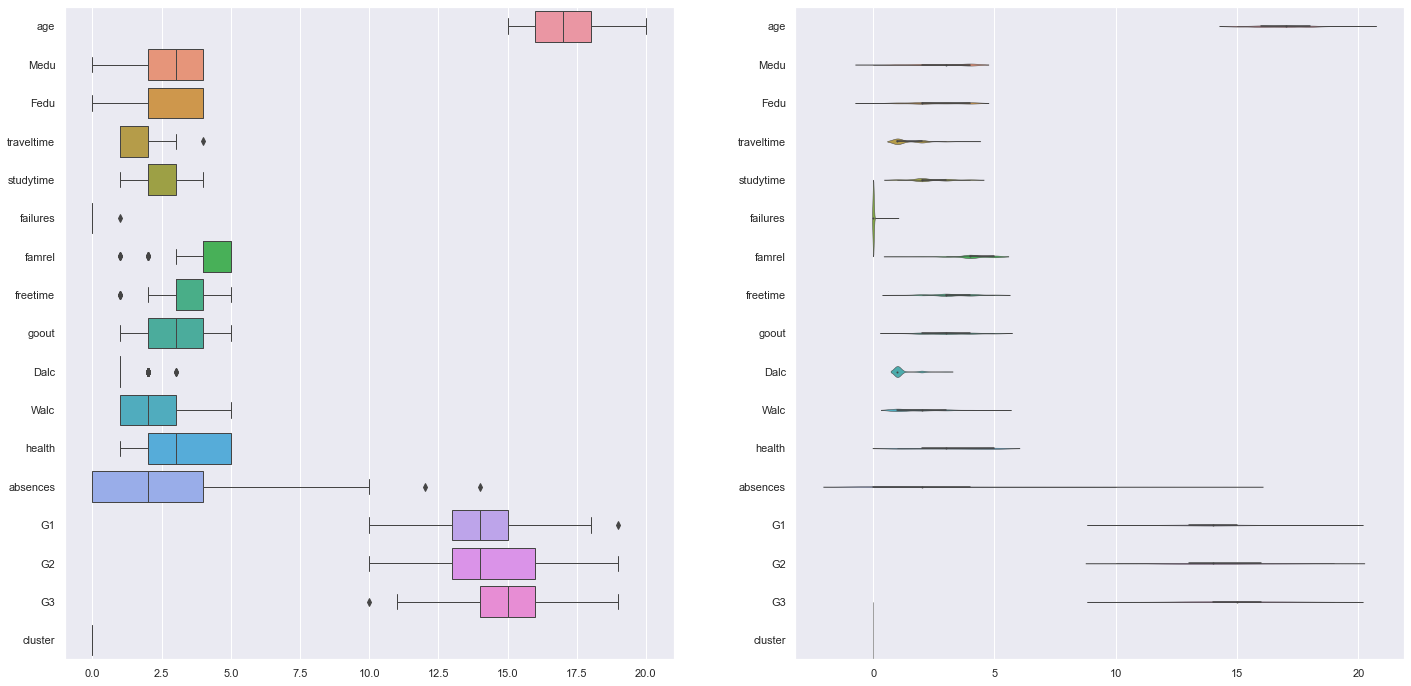

In [94]:
f, axes = plt.subplots(1,2, figsize = (24,12))

sb.boxplot(data = red, orient= 'h', width=0.8, linewidth = 1, ax = axes[0])
sb.violinplot(data = red, orient = 'h', ax =axes[1], width=2, linewidth = 0.5)

<AxesSubplot:>

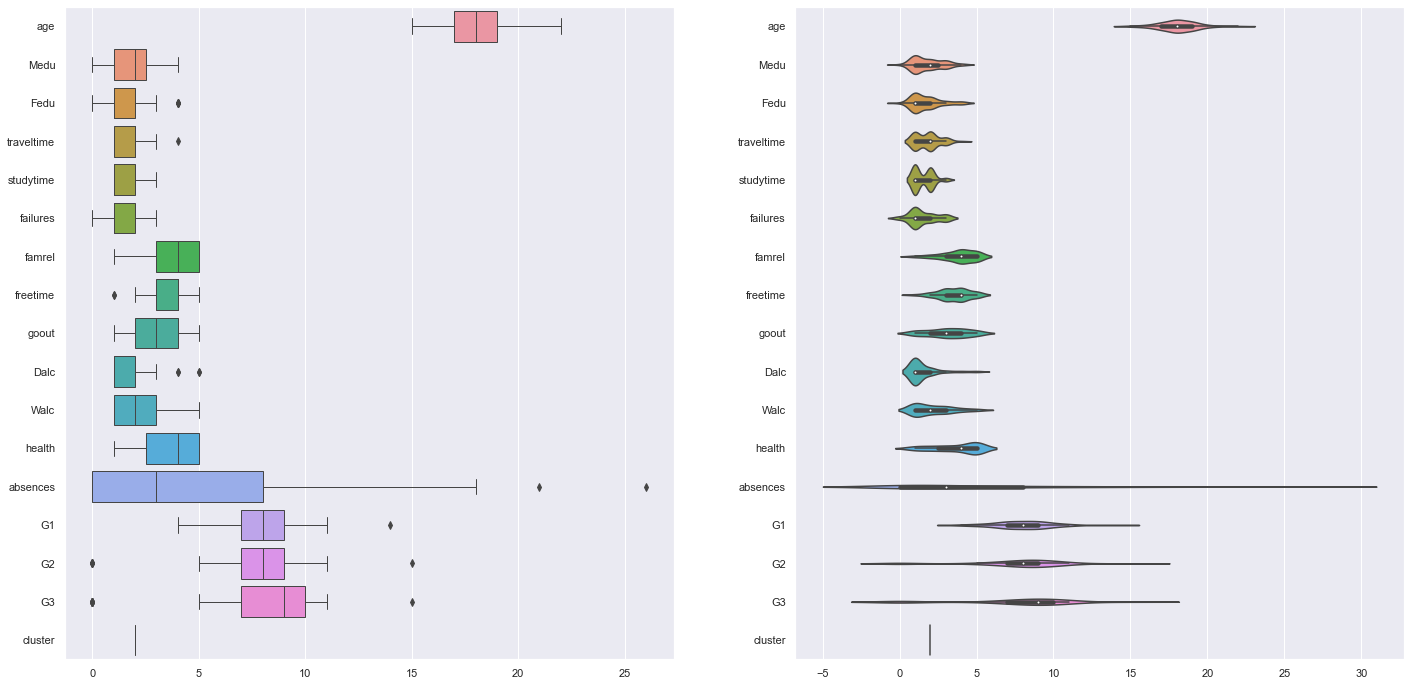

In [90]:
f, axes = plt.subplots(1,2, figsize = (24,12))

sb.boxplot(data = blue, orient= 'h', width=0.8, linewidth = 1, ax = axes[0])
sb.violinplot(data = blue, orient = 'h', ax =axes[1])

By looking at the mean values of the variables, we can conclude that:

Students with better grades have the following attributes:

    1) Young
    2) Parents having higher education level  
    3) Shorter home to school travel time
    4) Longer weekly study time
    5) Less number of class failures
    6) Better quality of family relationships
    7) More free time after school
    8) Hang out with friends more
    9) Lower levels of alcohol consumption on both workdays and weekends
    10) LOWER health levels 
    11) Lower numbers of school absences